# ```meijer.Meijer``` class examples.

## 1. Create ```Meijer``` instance.

In [10]:
%load_ext autoreload
%autoreload 2
import sys, os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
sys.path.append(os.path.abspath("../meijer"))
# Meijer Class.
from meijer import Meijer

# m = Meijer("<mperks-email>|<mperks-password>") # Password, not PIN.
# If no meijer_api_key is specified the class looks at the MEIJER_API_KEY environmental variable. 
m = Meijer()
self = m # Dev work.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## UPC Lookup

Look up Meijer UPCs and return data.

In [11]:
m.get_upc?

# Call ```.get_upc()```

Defaults:

- upc='4125010200' [Meijer Vitamin D milk]
- storeID='226' [Rockford Meijer Store, chosen at random]


In [12]:
m.get_upc()

{'meta': {'totalResults': 1,
  'startingIndex': 0,
  'resultsReturned': 1,
  'sort': 'score desc,upc asc',
  'facets': [{'field': 'hw_claims',
    'displayName': 'Health and Wellness',
    'type': 'value',
    'values': []},
   {'field': 'ways_to_save',
    'displayName': 'Ways to Save',
    'type': 'value',
    'values': []}],
  'categories': [{'field': 'TierId',
    'displayName': 'Category',
    'values': [{'value': 'T2-10308', 'display': 'Dairy', 'count': 1},
     {'value': 'T2-10428', 'display': 'Mixed Fruit Tart', 'count': 1},
     {'value': 'T2-10658', 'display': 'Breakfast', 'count': 1},
     {'value': 'T2-10666', 'display': 'Rocky Road Brownies', 'count': 1},
     {'value': 'T2-10697', 'display': 'Holiday Baking', 'count': 1},
     {'value': 'T2-9974', 'display': 'Dairy', 'count': 1},
     {'value': 'T2-9979', 'display': 'Cereal & Breakfast', 'count': 1}]}]},
 'upcs': [{'id': '226_UPCA_4125010200',
   'score': 99.642525,
   'storeId': 226,
   'upc': '4125010200',
   'upc_type'

## List all Stores

In [14]:
stores = m.stores()
stores

[{'AuxUnitInfo': None,
  'GasStationAmenities': None,
  'GasStationHours': [{'DayOfTheWeek': 'Sunday',
    'OpenTime': '00:00:00',
    'CloseTime': '00:00:00'},
   {'DayOfTheWeek': 'Monday', 'OpenTime': '00:00:00', 'CloseTime': '00:00:00'},
   {'DayOfTheWeek': 'Tuesday',
    'OpenTime': '00:00:00',
    'CloseTime': '00:00:00'},
   {'DayOfTheWeek': 'Wednesday',
    'OpenTime': '00:00:00',
    'CloseTime': '00:00:00'},
   {'DayOfTheWeek': 'Thursday',
    'OpenTime': '00:00:00',
    'CloseTime': '00:00:00'},
   {'DayOfTheWeek': 'Friday', 'OpenTime': '00:00:00', 'CloseTime': '00:00:00'},
   {'DayOfTheWeek': 'Saturday',
    'OpenTime': '00:00:00',
    'CloseTime': '00:00:00'}],
  'FuelPrices': [{'FuelType': 'UNL-Regular Unleaded',
    'FuelPrice': 1.899,
    'PriceEffectiveDate': '2020-05-07T14:15:37.683'},
   {'FuelType': 'MID-Medium Unleaded',
    'FuelPrice': 2.199,
    'PriceEffectiveDate': '2020-05-07T14:15:37.683'},
   {'FuelType': 'PREM-Premium Unleaded',
    'FuelPrice': 2.499,
    

# Find All Vitamin D Milk Prices

In [15]:
data = list()
for store in tqdm(stores):
    upc_data = m.get_upc(storeID=store["unitid"])
    if len(upc_data["upcs"])>0:
        try:
            tmp = {
                "storeid": store["unitid"],
                "latitude": store["latitude"],
                "longitude": store["longitude"],
                "MeijerVitaminD": upc_data["upcs"][0]["priceValue"],
            } 
            data.append(tmp)
        except KeyError:
            # Out of stock?
            pass

In [16]:
len(data)

246

In [17]:
len(stores)

254

# Convert Pricing Data to pandas DataFrame

In [18]:
df = pd.DataFrame(data)

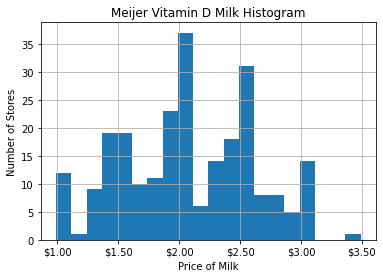

In [21]:
ax = df.MeijerVitaminD.hist(bins=20)
plt.title("Meijer Vitamin D Milk Histogram")
plt.xlabel("Price of Milk")
plt.ylabel("Number of Stores")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.2f}"))

## Unleaded Gas vs Vitamin D Prices

In [22]:
stores = m.stores()

In [28]:
data = list()
for store in tqdm(stores):
    upc_data = m.get_upc(self,storeID=store["unitid"])
    if len(upc_data["upcs"])>0:
        tmp = {
            "storeid": store["unitid"],
            "latitude": store["latitude"],
            "longitude": store["longitude"],
            "MeijerVitaminD": upc_data["upcs"][0]["priceValue"],
        }
        if store["FuelPrices"] is not None:
            for fuel_price in store["FuelPrices"]:
                fuel_type = fuel_price["FuelType"].split("-")[0]
                fuel_price = fuel_price["FuelPrice"]
                tmp[fuel_type]=fuel_price
        data.append(tmp)
df = pd.DataFrame(data)

100%|██████████| 254/254 [01:25<00:00,  2.98it/s]


In [ ]:
df

In [ ]:
df.plot.scatter(x="UNL", y="MID")

In [ ]:
df.plot.scatter(x="UNL", y="MeijerVitaminD")